<a href="https://colab.research.google.com/github/chaeyoooo/capstondesign_voicefishing/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install speechbrain

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install pydub
!apt-get install ffmpeg


# ✅ 1. 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# ✅ 2. 라이브러리 임포트
import os
import pandas as pd
from pydub import AudioSegment
from transformers import AutoFeatureExtractor, AutoModelForAudioClassification
import torch
import librosa

# ✅ 3. 경로 설정
pcm_dir = "/content/drive/MyDrive/SDRW2400000710/"   # .pcm 폴더
wav_dir = "/content/drive/MyDrive/SDRW2400000710_wav"              # .wav 저장 폴더
os.makedirs(wav_dir, exist_ok=True)

# ✅ 4. .pcm → .wav 변환
pcm_files = [f for f in os.listdir(pcm_dir) if f.endswith('.pcm')]
print(f"✅ 발견된 .pcm 파일 수: {len(pcm_files)}")

for pcm_file in pcm_files:
    pcm_path = os.path.join(pcm_dir, pcm_file)
    wav_path = os.path.join(wav_dir, pcm_file.replace('.pcm', '.wav'))

    audio = AudioSegment.from_file(
        pcm_path,
        format="raw",
        frame_rate=16000,   # 샘플링 주파수 (필요 시 맞춰줘)
        channels=1,         # 모노
        sample_width=2      # 16bit PCM → 2 bytes
    )
    audio.export(wav_path, format="wav")
    print(f"🎶 변환 완료: {pcm_file} → {wav_path}")

# ✅ 5. .wav 리스트
wav_files = [f for f in os.listdir(wav_dir) if f.endswith('.wav')]
print(f"✅ 변환된 wav 파일 수: {len(wav_files)}")

# ✅ 6. 감정분석 모델 로드
model_name = "superb/hubert-large-superb-er"
extractor = AutoFeatureExtractor.from_pretrained(model_name)
model = AutoModelForAudioClassification.from_pretrained(model_name)

# ✅ 7. wav별 감정분석
emotion_results = []

for wav_file in wav_files:
    file_path = os.path.join(wav_dir, wav_file)

    # 오디오 로드
    speech, sr = librosa.load(file_path, sr=16000)

    inputs = extractor(speech, sampling_rate=16000, return_tensors="pt", padding=True)

    with torch.no_grad():
        logits = model(**inputs).logits

    predicted_id = logits.argmax(-1).item()
    label = model.config.id2label[predicted_id]
    confidence = torch.softmax(logits, dim=-1)[0][predicted_id].item()

    emotion_results.append({
        'file': wav_file,
        'emotion': label,
        'confidence': confidence
    })

    print(f"🎤 {wav_file}: {label} ({confidence:.2f})")

# ✅ 8. DataFrame 생성
new_emotion_df = pd.DataFrame(emotion_results)

# ✅ 9. 기존 emotion_results.csv 로드
existing_emotion_path = "/content/drive/MyDrive/emotion_results.csv"
emotion_df = pd.read_csv(existing_emotion_path)

# ✅ 10. append
updated_emotion_df = pd.concat([emotion_df, new_emotion_df], ignore_index=True)

# ✅ 11. 저장
save_path = "/content/drive/MyDrive/emotion_results_updated.csv"
updated_emotion_df.to_csv(save_path, index=False)

print(f"✅ emotion_results 업데이트 완료 → 저장 경로: {save_path}")


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ 발견된 .pcm 파일 수: 240
🎶 변환 완료: SDRW2400000710.1.1.66.pcm → /content/drive/MyDrive/SDRW2400000710_wav/SDRW2400000710.1.1.66.wav
🎶 변환 완료: SDRW2400000710.1.1.99.pcm → /content/drive/MyDrive/SDRW2400000710_wav/SDRW2400000710.1.1.99.wav
🎶 변환 완료: SDRW2400000710.1.1.170.pcm → /content/drive/MyDrive/SDRW2400000710_wav/SDRW2400000710.1.1.170.wav
🎶 변환 완료: SDRW2400000710.1.1.171.pcm → /content/drive/MyDrive/SDRW2400000710_wav/SDRW2400000710.1.1.171.wav
🎶 변환 완료: SDRW2400000710.1.1.165.pcm → /content/drive/MyDrive/SDRW2400000710_wav/SDRW2400000710.1.1.165.wav
🎶 변환 완료: SDRW2400000710.1.1.159.pcm → /content/drive/MyDrive/SDRW2400000710_wav/SDRW240000071

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ 불러온 데이터 미리 보기:
                                                file  \
0  _____________________________________________1...   
1  _____________________________________________1...   
2  _____________________________________________1...   
3  ____________________________________________tr...   
4  ____________________________________________tr...   

                                    transcribed_text  keyword_count      type  \
0   여보세요? 네 여기 강남서 사이버스사과예요 어디요? 강남서 사이버스사과요 강남서?...              1  phishing   
1   여보세요? 네 여기 강남서 사이버스사과예요 어디요? 강남서 사이버스사과요 강남서?...              1  phishing   
2   여보세요? 네 여기 강남서 사이버스사과예요 어디요? 강남서 사이버스사과요 강남서?...              1  phishing   
3   여보세요? 여기 강남서 사이버스 사과예요. 어디요? 강남서 사이버스 사과예요. 강...              1  phishing   
4   여보세요? 여기 강남서 사이버스 사과예요. 어디요? 강남서 사이버스 사과예요. 강...              1  phishing   

  emotion  confidence  is_deep

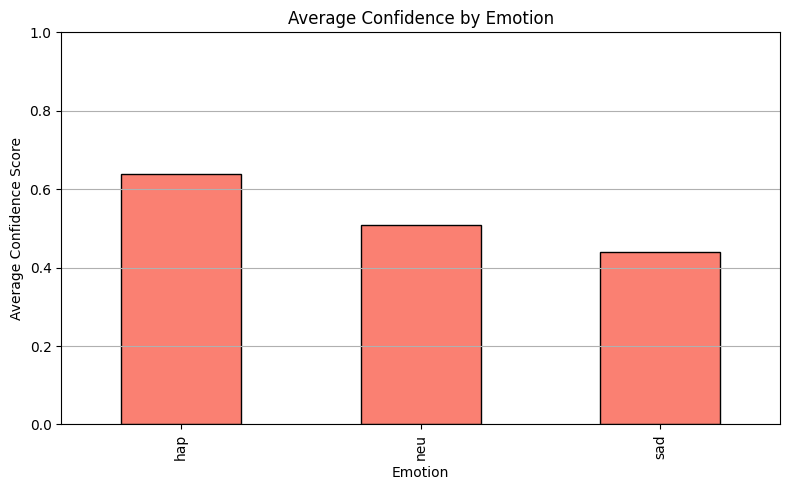

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


# 너의 실제 파일 경로 확인해서 여기에 넣어줘!
csv_path = "/content/drive/MyDrive/augmented_dataset.csv"

df = pd.read_csv(csv_path)
print("✅ 불러온 데이터 미리 보기:")
print(df.head())


import pandas as pd
import matplotlib.pyplot as plt

# 예시용 데이터프레임 생성
# df = pd.read_csv("your_emotion_result.csv") ← 여기에 실제 파일 불러오면 돼

# 감정별 평균 신뢰도 계산
emotion_conf = df.groupby('emotion')['confidence'].mean().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(8,5))
emotion_conf.plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Average Confidence by Emotion")     # 그래프 제목
plt.xlabel("Emotion")                          # x축: 감정 라벨
plt.ylabel("Average Confidence Score")         # y축: 평균 신뢰도
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
